In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

## Loading data

In [150]:
df = pd.read_csv("../data/data.csv")

## Cleaning and making 'price', 'mileage' columns numerical and ready to work with

In [151]:
df['price'] = df['price'].str.replace('€', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = pd.to_numeric(df['price'])

In [152]:
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace('-', np.nan)
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace("tūkst.", "", regex=True)
df.loc[:, "mileage"] = df["mileage"].str.strip()
df.loc[:,'mileage'] = pd.to_numeric(df['mileage'])

## Removing duplicates that may been saved when scraping

In [153]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

## Some plots for insights (TODO)

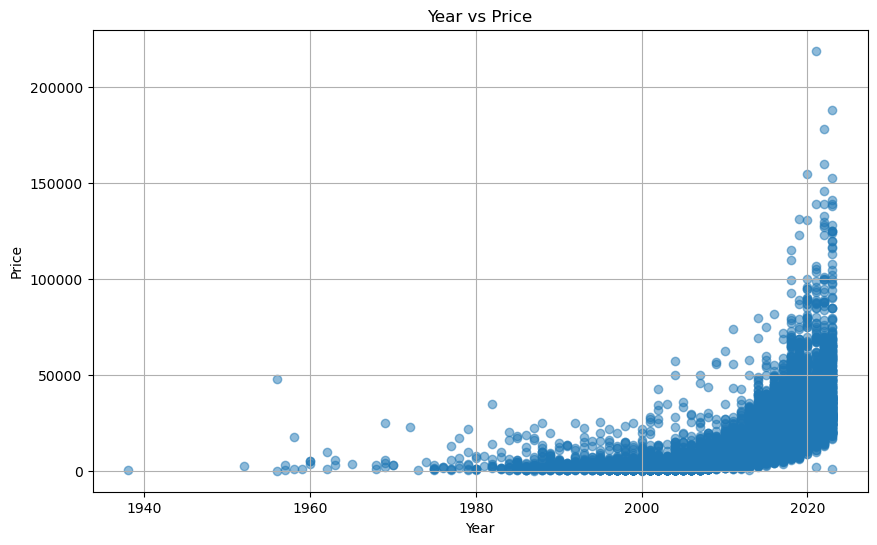

In [154]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['price'], alpha=0.5)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## Feature engineering

In [155]:
## There is no need for car year as is, we can replace it with age
df["age"] = 2023 - df["year"] 
df = df.drop(columns="year")

In [156]:
## Only few engine volumes are possible for certain model,
## it makes sense to keep them together -- also decreasing cardinality when one hotting.

#df["model_engine"] = df['model'] + '_' + df['engine']
#df = df.drop(columns=['model', 'engine'])

In [157]:
df.head(5)

,brand,model,engine,mileage,price,age
0,Alfa Romeo,Stelvio,2.0,88.0,24850,4
1,Alfa Romeo,Stelvio,2.0,91.0,34500,3
2,Alfa Romeo,156,2.0,NaN,1800,23
3,Alfa Romeo,159,2.0D,343.0,1850,13
4,Alfa Romeo,Giulia,2.2D,NaN,20990,7


## Handling NaNs -- median imputing + binary column that tells if value was imputed

In [158]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [159]:
for column in df.columns:
    if sum(df[column].isna()) != 0:
        print(f"NaNs in {column}")
    else:
        print(f"{column} has no NaNs")

brand has no NaNs
model has no NaNs
engine has no NaNs
NaNs in mileage
price has no NaNs
age has no NaNs


In [160]:
nan_indices = df['mileage'].isna()
df['mileage'] = imputer.fit_transform(df[['mileage']])
df['mileage_inputed'] = nan_indices.astype(int)

In [161]:
any(df["mileage"].isna()) 

False

## Encoding categorical features (one-hot)

In [162]:
df = pd.get_dummies(df, columns=['brand', 'model' ,'engine'])

In [163]:
df.shape ### Big increase in cardinality, but it encoding is crucial

(21102, 974)

## Scaling numerical columns 

In [164]:
num_names = ['age', 'mileage']
num_cols = df[num_names]

scaler = MinMaxScaler(feature_range=(-1, 1))

scaled_nums = scaler.fit_transform(num_cols)

df[num_names] = scaled_nums

joblib.dump(scaler, "minmax.save")

['minmax.save']

## Dataset ready -- export to csv

In [148]:
df.to_csv("../data/cleaned_data.csv", index = False)